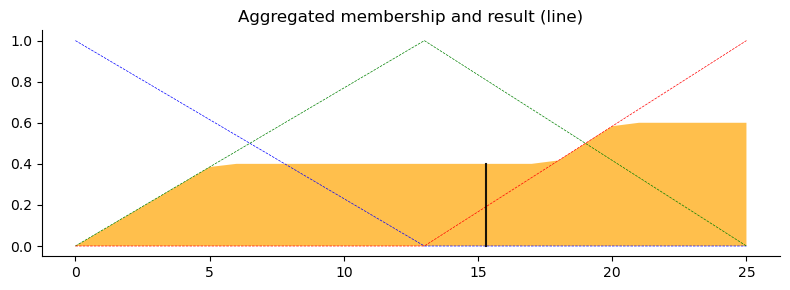

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Contoh pengujian fuzzy rule dengan nilai input yang berbeda
qual_input = 7
serv_input = 8

qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, qual_input)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, qual_input)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, qual_input)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, serv_input)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, serv_input)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, serv_input)

active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)

tip_activation_md = np.fmin(serv_level_md, tip_md)

active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)

# Aggregasi
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))

# Deffuzifikasi dengan metode selain centroid (misal: bisector)
tip = fuzz.defuzz(x_tip, aggregated, 'bisector')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)

# Visualisasi hasil
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, np.zeros_like(x_tip), aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()